# Project Proposal: Group 59
### Jin Kim, Emily Ishii, Natasha Larin, Syed Haque

### Introduction

The Heart Disease dataset we will be analysing contains 14 attributes of 303 patients. We will be using the data found in the `processed.cleveland.data` file in the Heart Disease dataset directory. The attributes comprise parts of each patient’s health report, as well as their diagnosis of heart disease. Using this data, we will be answering which factors within the health report are the most influential in predicting the detection of heart disease in patients. 

* Age of patient (age) - years
* Sex of the patient (sex)
    * 1 = Male
    * 2 = Female
* Chest pain type (cp)
    * 1 = Typical Angina
    * 2 = Atypical Angina
    * 3 = Non-aginal Pain
    * 4 = Asymptomatic
* Blood pressure (trestbps) - mm Hg
* Cholesterol (chol) - mg/dl
* Fasting blood sugar > 120 mg/dl (fbs) - true or false
* Resting ECG results (restecg)
    * 0 = Normal
    * 1 = Abnormal
    * 2 = Probable or definite left ventricular hypertrophy
* Maximum heart rate achieved (thalach) - bpm
* Exercise induced agina (exang)
    * 0 = No
    * 1 = Yes
* Depression induced by exercise related to rest (oldpeak)
* Slope of the peake exercise segment (slope)
* Number of major vessels (ca)
* Condition (thal)
    * 3 = Normal
    * 6 = fixed defect
    * 7 = reversable defect
* Diagnosis of heart disease (num)
    * num = severity or existence of heart disease
    
Our question: **Which factors within the health report are the most influential in predicting the detection of heart disease in patients?**

### Preliminary Exploratory Data Analysis

In [1]:
library(tidyverse)
library(tidymodels)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Reading in, tidying, and splitting the dataset**

In [2]:
names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
patient_data <- read_csv("data/processed.cleveland.data", col_names = names) |>
    mutate(num = as_factor(num)) |>
    mutate(cp = as_factor(cp)) |>
    mutate(sex = as_factor(sex)) |>
    mutate(exang = as_factor(exang)) |>
    mutate(slope = as_factor(slope)) |>
    mutate(restecg = as_factor(restecg)) |>
    mutate(ca = as_factor(ca)) |>
    mutate(thal = as_factor(thal)) |>
    mutate(fbs = as.logical(fbs)) |>
    select(age, trestbps, chol, thalach, oldpeak, num) # Since we are classifying using these variables, we should select only continuous variables (data of type double)


patient_split <- initial_split(patient_data, prop = 0.75, strata = num)
training_data <- training(patient_split)
testing_data <- testing(patient_split)

training_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,trestbps,chol,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,2.3,0
41,130,204,172,1.4,0
56,120,236,178,0.8,0
57,120,354,163,0.6,0
57,140,192,148,0.4,0
44,120,263,173,0.0,0
52,172,199,162,0.5,0
57,150,168,174,1.6,0
54,140,239,160,1.2,0


**Summarizing the training dataset**

In [3]:
data_summary <- training_data |>
    group_by(num) |>
    summarize(mean_age = mean(age), mean_trestbps = mean(trestbps), mean_chol = mean(chol), mean_thalach = mean(thalach), mean_oldpleak = mean(oldpeak))
data_summary

num,mean_age,mean_trestbps,mean_chol,mean_thalach,mean_oldpleak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,52.52419,128.2177,241.9355,158.6855,0.5354839
1,55.32500,133.6250,251.7500,144.7250,0.9500000
2,57.48148,134.8519,260.8148,135.2963,1.9111111
3,56.80769,139.1923,247.1923,134.3077,2.0115385
4,57.66667,137.1111,232.0000,139.5556,2.5888889


**Visualizing the training dataset**

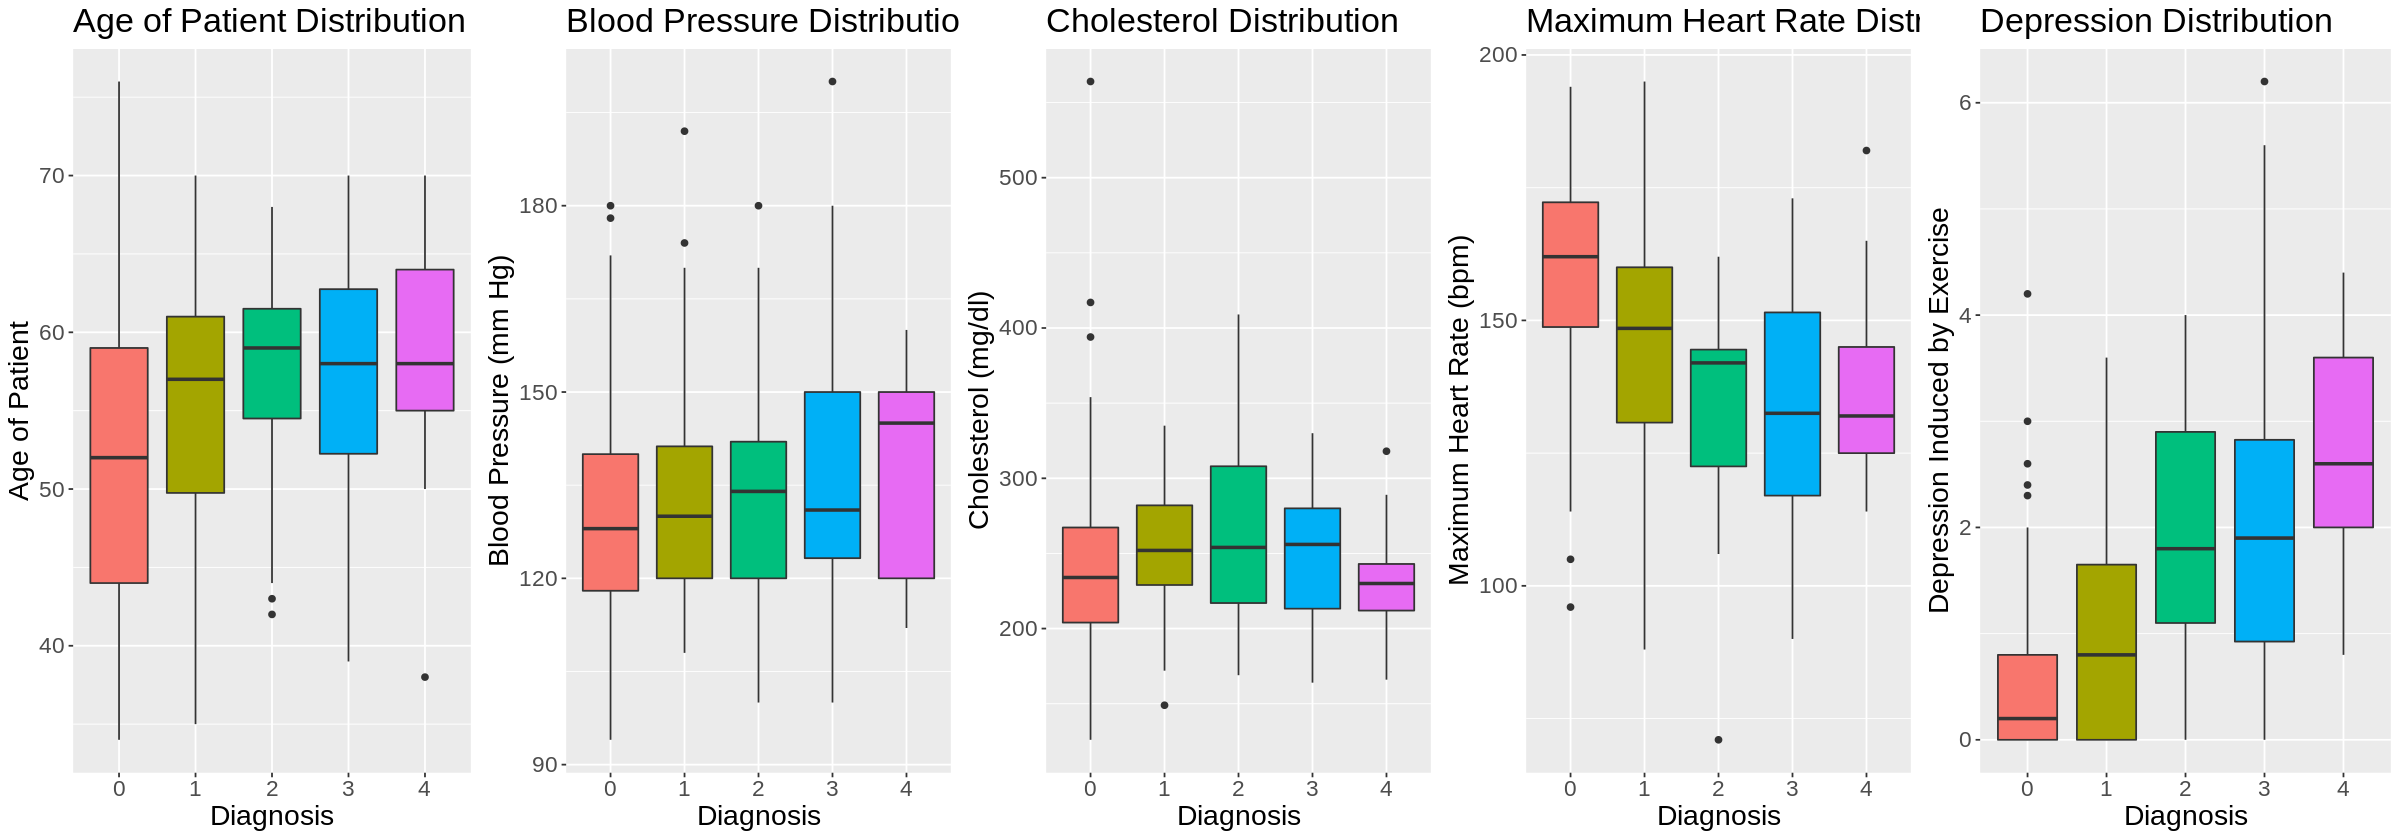

In [4]:
options(repr.plot.width = 20, repr.plot.height = 7)
age_boxplot <- training_data |>
    ggplot(aes(x = num, y = age, fill = num)) +
    geom_boxplot(show.legend = FALSE) +
    labs(x = "Diagnosis", y = "Age of Patient") +
    ggtitle("Age of Patient Distribution") +
    theme(text = element_text(size = 17))
testbps_boxplot <- training_data |>
    ggplot(aes(x = num, y = trestbps, fill = num)) +
    geom_boxplot(show.legend = FALSE) +
    labs(x = "Diagnosis", y = "Blood Pressure (mm Hg)") +
    ggtitle("Blood Pressure Distribution") +
    theme(text = element_text(size = 17))
chol_boxplot <- training_data |>
    ggplot(aes(x = num, y = chol, fill = num)) +
    geom_boxplot(show.legend = FALSE) +
    labs(x = "Diagnosis", y = "Cholesterol (mg/dl)") +
    ggtitle("Cholesterol Distribution") +
    theme(text = element_text(size = 17))
thalach_boxplot <- training_data |>
    ggplot(aes(x = num, y = thalach, fill = num)) +
    geom_boxplot(show.legend = FALSE) +
    labs(x = "Diagnosis", y = "Maximum Heart Rate (bpm)") +
    ggtitle("Maximum Heart Rate Distribution") +
    theme(text = element_text(size = 17))
oldpeak_boxplot <- training_data |>
    ggplot(aes(x = num, y = oldpeak, fill = num)) +
    geom_boxplot(show.legend = FALSE) +
    labs(x = "Diagnosis", y = "Depression Induced by Exercise") +
    ggtitle("Depression Distribution") +
    theme(text = element_text(size = 17))
training_visualization <- plot_grid(age_boxplot, testbps_boxplot, chol_boxplot, thalach_boxplot, oldpeak_boxplot, ncol = 5)
training_visualization

### Methods

To answer our question, we will first need to choose our predictor variables. Out of the 5 continuous variables that we have, we can see that all of them have a variation in mean depending on the diagnosis, so we can choose these variables to be our predictors. Next, we will use our training dataset (75% of original data) to train our classification model in combination with cross validation to find the accuracy for multiple $k$ values that are used in the nearest neighbor algorithm. Afterwards, we will plot the values against their accuracy and select the most accurate $k$ which we will then use the test set to evaluate the model. Finally, we will visualize the data of the testing set and compare it to a graph of the predicted results using the predictor variables of the testing set so that our results can be visualized and further understood.


### Expected outcomes and significance

After our data analysis, we expect to find if all of the predictors that we used are influential in determining if a patient has heart disease, and if they can create an accurate classification model. The accuracy of our model can determine its possible roles in the real world. For instance, a model that is very accurate can be used in hospitals, while a model that is moderately accurate can be used for preliminary speculation. In the future, we can incorporate other types of variables, such as categorical ones included in our data set (eg. Condition, RECG results), which could make our model even more precise for predicting heart disease diagnosis. Also, as more relevant data is collected, we can add additional variables to our data set that can also be considered in our prediction model.